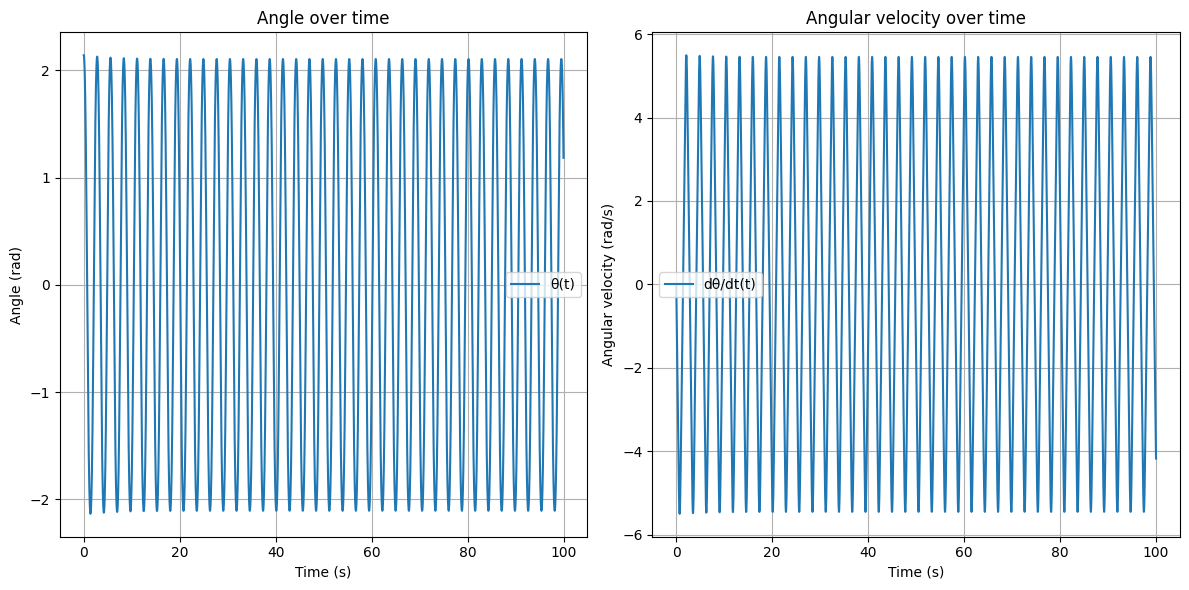

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)

# Equations of motion
def equations_of_motion(t, y):
    theta, theta_dot = y
    theta_ddot = -g_val / L_val * np.sin(theta)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 100)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # 500 time steps

# Solve the differential equation
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


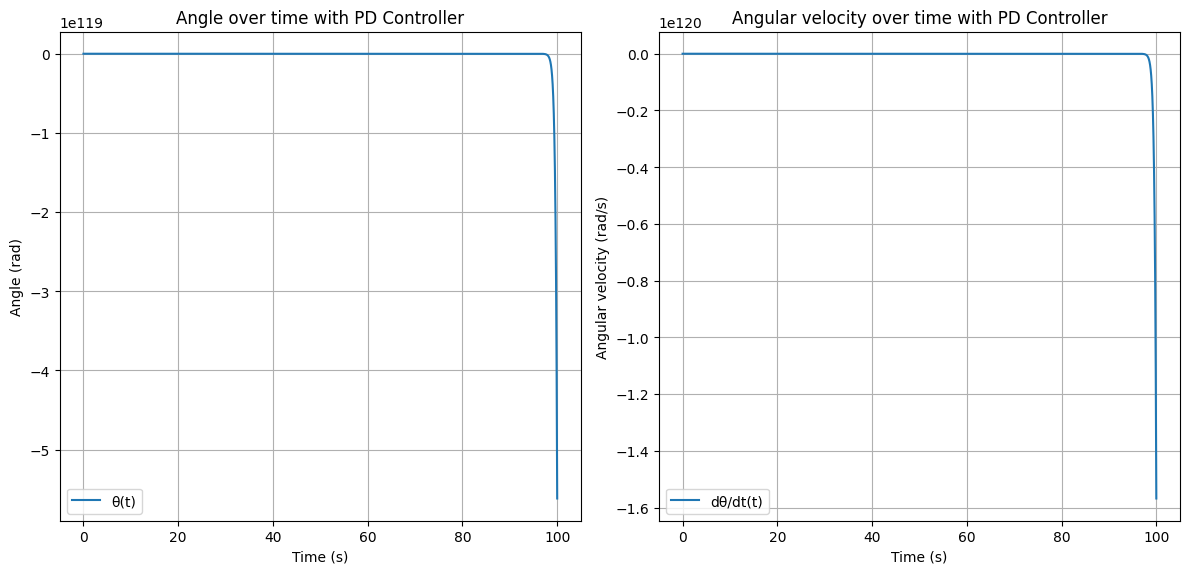

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 5.0  # Proportional gain
K_d = 1.0  # Derivative gain

# Equations of motion with PD controller
def controlled_equations_of_motion(t, y):
    theta, theta_dot = y
    u = K_p * theta + K_d * theta_dot  # PD control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi/2  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 100)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time with PD Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PD Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


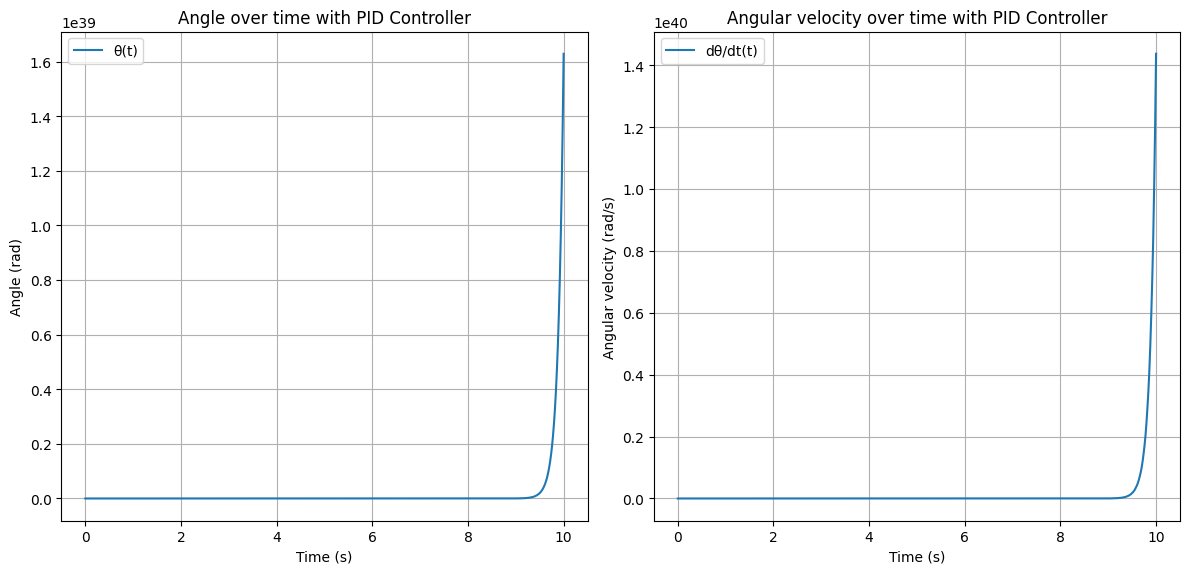

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 15.0  # Proportional gain
K_d = 5.0  # Derivative gain
K_i = 2.0  # Integral gain

integral_error = 0  # Initialize integral error

# Equations of motion with PID controller
def controlled_equations_of_motion(t, y):
    global integral_error
    theta, theta_dot = y
    integral_error += theta  # Update integral error
    u = K_p * theta + K_d * theta_dot + K_i * integral_error  # PID control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 0.1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


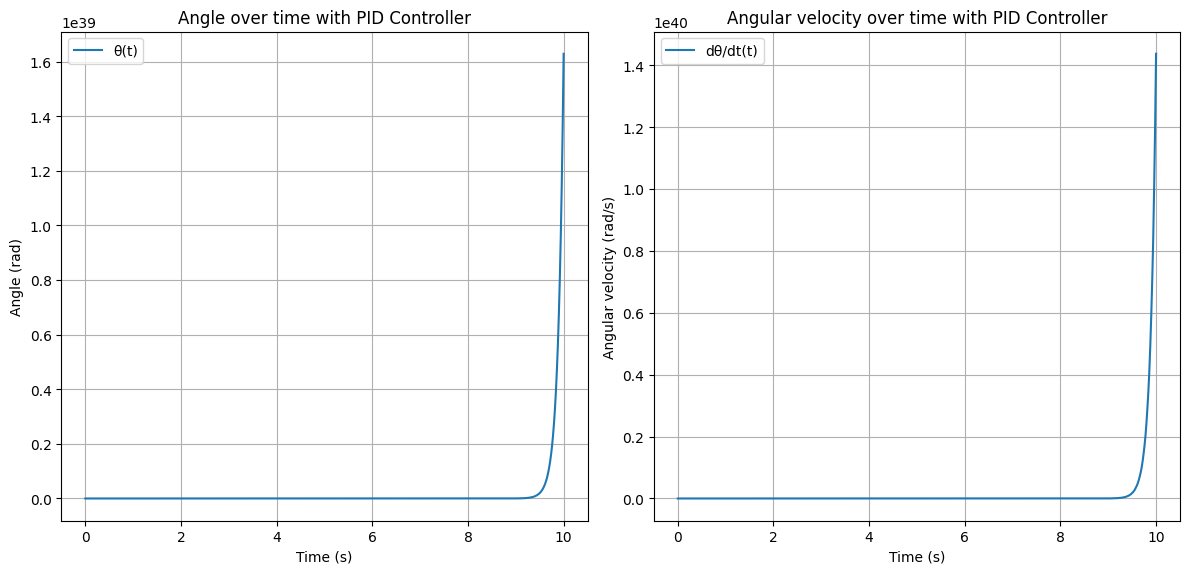

In [25]:
#inverse pendulum modelling
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 15.0  # Proportional gain
K_d = 5.0  # Derivative gain
K_i = 2.0  # Integral gain

integral_error = 0  # Initialize integral error

# Equations of motion with PID controller
def controlled_equations_of_motion(t, y):
    global integral_error
    theta, theta_dot = y
    integral_error += theta  # Update integral error
    u = K_p * theta + K_d * theta_dot + K_i * integral_error  # PID control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 0.1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution

t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



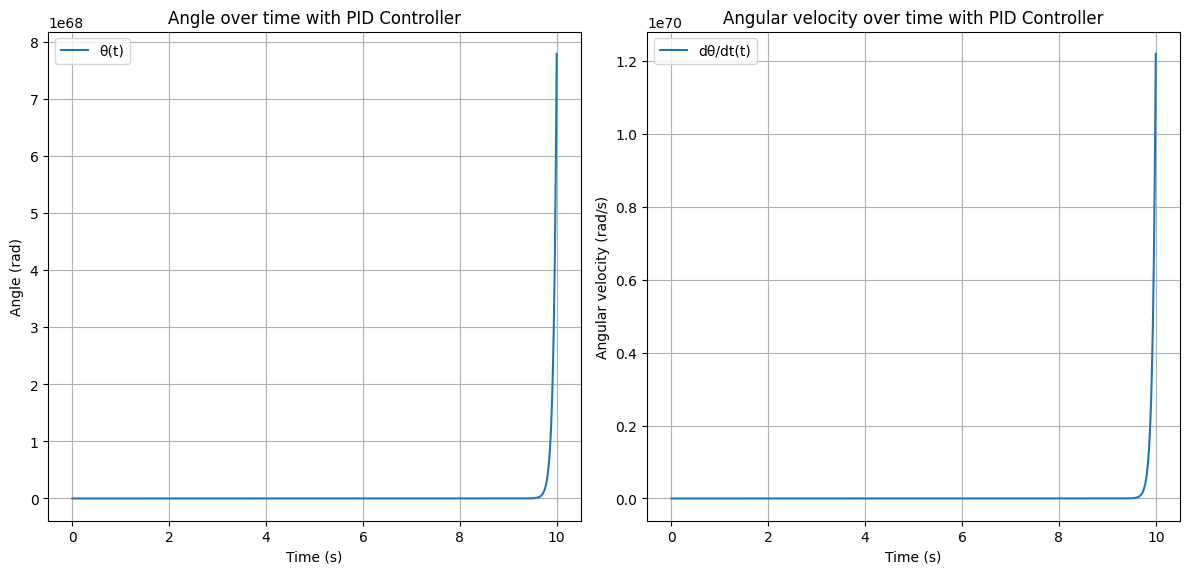

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 50.0  # Proportional gain
K_d = 10.0  # Derivative gain
K_i = 5.0  # Integral gain

integral_error = 0  # Initialize integral error

# Equations of motion with PID controller
def controlled_equations_of_motion(t, y):
    global integral_error
    theta, theta_dot = y
    integral_error += theta  # Update integral error
    u = K_p * theta + K_d * theta_dot + K_i * integral_error  # PID control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi / 2  # Starting from a horizontal position
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
#generate the equations of motion for the inverted pendulum using Sympy mechanics
import sympy as sym
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import ReferenceFrame
from sympy.physics.mechanics import Point
from sympy.physics.mechanics import Particle
from sympy.physics.mechanics import inertia
from sympy.physics.mechanics import RigidBody
from sympy.physics.mechanics import KanesMethod
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

# Define the generalized coordinates
theta = dynamicsymbols('theta')
x = dynamicsymbols('x')

# Define the generalized speeds
theta_dot = dynamicsymbols('theta_dot')
x_dot = dynamicsymbols('x_dot')

# Define the constants
L = symbols('L')
m = symbols('m')
g = symbols('g')

# Define the inertial reference frame
inertial_frame = ReferenceFrame('I')

# Define the origin of the reference frame
origin = Point('O')
origin.set_vel(inertial_frame, 0)

# Define the point where the pendulum is attached
pivot = Point('P')
pivot.set_pos(origin, x * inertial_frame.x)
pivot.set_vel(inertial_frame, x_dot * inertial_frame.x)


#generate EOMs
# Define the center of mass
com = pivot.locatenew('COM', L / 2 * inertial_frame.y)
com.v2pt_theory(pivot, inertial_frame, inertial_frame)
com.a2pt_theory(pivot, inertial_frame, inertial_frame)

# Define the rigid body
inertia_dyadic = inertia(inertial_frame, 0, 0, m * L**2 / 12)
pendulum = RigidBody('Pendulum', com, inertial_frame, m, (inertia_dyadic, com))

# Define the forces
gravitational_force = (com, -m * g * inertial_frame.y)
forces = [gravitational_force]
kane = KanesMethod(inertial_frame, q_ind=[theta, x], u_ind=[theta_dot, x_dot], kd_eqs=[theta_dot - x_dot])
# Generate the equations of motion
fr, frstar = kane.kanes_equations(forces, [pendulum])



ValueError: There must be an equal number of kinematic differential equations and coordinates.

In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import lambdify symbols, cos

# Given parameters
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
l_val = 1.0  # Length of the pendulum (in meters)
F0 = 1.0  # Constant external force
F = symbols('F')
equations = L_method.form_lagranges_equations()
theta_ddot = equations.rhs[0]
# Convert the equation of motion to a function
f = lambdify((theta, theta_dot, m, g, l_val, F), equations[0].rhs, "numpy")

def inverted_pendulum(t, y):
    theta, theta_dot = y
    theta_ddot = f(theta, theta_dot, m_val, g_val, l_val, F0)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi / 2  # Starting from a horizontal position
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation
solution = solve_ivp(inverted_pendulum, t_span, initial_conditions, t_eval=t_eval)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(solution.t, solution.y[0], label='θ(t)')
plt.title('Angle over time with External Force')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()
plt.show()


AttributeError: 'Zero' object has no attribute 'rhs'